### 1. **Can we use Bagging for regression problems?**

✅ **Yes.**
Bagging can be used for regression problems by aggregating predictions using the **average** instead of majority voting (as used in classification).

---

### 2. **What is the difference between multiple model training and single model training?**

**Single model training** uses one algorithm to learn from the data, while **multiple model training** (ensemble) combines predictions from several models to improve accuracy and robustness.

---

### 3. **Explain the concept of feature randomness in Random Forest.**

Random Forest introduces **feature randomness** by selecting a random subset of features at each split, which **reduces correlation between trees** and improves generalization.

---

### 4. **What is OOB (Out-of-Bag) Score?**

OOB score is an internal validation score computed from samples **not included** in the bootstrap sample for a tree. It acts like cross-validation in Bagging and Random Forests.

---

### 5. **How can you measure the importance of features in a Random Forest model?**

By evaluating how much each feature **decreases impurity** (Gini/entropy for classification, MSE for regression) or by **permutation importance** (shuffling features and checking impact on accuracy).

---

### 6. **Explain the working principle of a Bagging Classifier.**

A Bagging Classifier trains **multiple base models (e.g., decision trees)** on **bootstrapped samples** and **aggregates their predictions** (majority vote for classification).

---

### 7. **How do you evaluate a Bagging Classifier’s performance?**

Using metrics like **accuracy, precision, recall, F1-score**, and **cross-validation** or **OOB score** if applicable.

---

### 8. **How does a Bagging Regressor work?**

It works similarly to a Bagging Classifier, but instead of majority voting, it **averages the outputs** of base regressors trained on different bootstrapped samples.

---

### 9. **What is the main advantage of ensemble techniques?**

They **improve performance** (accuracy, robustness, generalization) by **reducing overfitting** and **variance** compared to a single model.

---

### 10. **What is the main challenge of ensemble methods?**

They can be **computationally expensive** and **less interpretable**, especially when combining many complex models.

---

### 11. **Explain the key idea behind ensemble techniques.**

Combine predictions from **multiple weak or diverse models** to form a **stronger and more accurate** model.

---

### 12. **What is a Random Forest Classifier?**

An ensemble of decision trees trained via **bagging** with added **feature randomness**, used for **classification tasks**.

---

### 13. **What are the main types of ensemble techniques?**

* **Bagging** (e.g., Random Forest)
* **Boosting** (e.g., AdaBoost, XGBoost)
* **Stacking** (combining multiple models with a meta-model)

---

### 14. **What is ensemble learning in machine learning?**

A technique where **multiple models** (learners) are trained and combined to solve the same problem for **better performance**.

---

### 15. **When should we avoid using ensemble methods?**

Avoid when:

* **Interpretability is critical**
* **Data is small or simple**
* **Computational resources are limited**

---

### 16. **How does Bagging help in reducing overfitting?**

By training models on **different bootstrapped samples**, it reduces variance and **avoids overfitting to noise** in the data.

---

### 17. **Why is Random Forest better than a single Decision Tree?**

Because it reduces **overfitting** and improves **accuracy** through **bagging** and **feature randomness**, making it more robust.

---

### 18. **What is the role of bootstrap sampling in Bagging?**

Bootstrap sampling creates **diverse training sets** for each base learner, encouraging **diversity** and **variance reduction**.

---

### 19. **What are some real-world applications of ensemble techniques?**

* Fraud detection
* Medical diagnosis
* Stock market prediction
* Spam detection
* Recommender systems

---

### 20. **What is the difference between Bagging and Boosting?**

| Aspect   | Bagging              | Boosting                           |
| -------- | -------------------- | ---------------------------------- |
| Training | Parallel             | Sequential                         |
| Focus    | Reduce variance      | Reduce bias                        |
| Data     | Bootstrapped samples | Weighted samples (based on errors) |
| Example  | Random Forest        | AdaBoost, XGBoost                  |



In [11]:
# 1. Train a Bagging Classifier using Decision Trees on a sample dataset and print model accuracy
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Load dataset
data = load_iris()
X, y = data.data, data.target

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize BaggingClassifier (use 'estimator' instead of 'base_estimator')
bagging = BaggingClassifier(estimator=DecisionTreeClassifier(), n_estimators=10, random_state=42)

# Train the model
bagging.fit(X_train, y_train)

# Predict and evaluate
y_pred = bagging.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Bagging Classifier Accuracy:", accuracy)



Bagging Classifier Accuracy: 1.0


In [12]:
# 2. Train a Bagging Regressor using Decision Trees and evaluate using Mean Squared Error (MSE)

from sklearn.ensemble import BaggingRegressor
from sklearn.datasets import fetch_california_housing
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

# Load California housing dataset
data = fetch_california_housing()
X, y = data.data, data.target

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the Bagging Regressor
regressor = BaggingRegressor(estimator=DecisionTreeRegressor(), n_estimators=10, random_state=42)
regressor.fit(X_train, y_train)

# Predict and evaluate
y_pred = regressor.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error (MSE):", mse)


Mean Squared Error (MSE): 0.2824242776841025


In [3]:
# 3. Train a Random Forest Classifier on the Breast Cancer dataset and print feature importance scores
from sklearn.datasets import load_breast_cancer
from sklearn.ensemble import RandomForestClassifier

X, y = load_breast_cancer(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)
rf_clf.fit(X_train, y_train)
print("Feature Importances:")
print(dict(zip(load_breast_cancer().feature_names, rf_clf.feature_importances_)))



Feature Importances:
{np.str_('mean radius'): np.float64(0.03971058001589694), np.str_('mean texture'): np.float64(0.01460399238170961), np.str_('mean perimeter'): np.float64(0.05314639159160505), np.str_('mean area'): np.float64(0.04277978484315134), np.str_('mean smoothness'): np.float64(0.008164846943636773), np.str_('mean compactness'): np.float64(0.011401661939305432), np.str_('mean concavity'): np.float64(0.08321459456610805), np.str_('mean concave points'): np.float64(0.09029920167767941), np.str_('mean symmetry'): np.float64(0.004435330908549195), np.str_('mean fractal dimension'): np.float64(0.0044339455657393815), np.str_('radius error'): np.float64(0.019516843091976745), np.str_('texture error'): np.float64(0.004599776446461486), np.str_('perimeter error'): np.float64(0.008682277708670269), np.str_('area error'): np.float64(0.04355077092397454), np.str_('smoothness error'): np.float64(0.0046441491045816855), np.str_('compactness error'): np.float64(0.003654903183809933), np.

In [13]:
# 4. Train a Random Forest Regressor and compare its performance with a single Decision Tree

from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Load dataset
data = fetch_california_housing()
X, y = data.data, data.target

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Random Forest Regressor
rf_reg = RandomForestRegressor(n_estimators=100, random_state=42)
rf_reg.fit(X_train, y_train)
rf_pred = rf_reg.predict(X_test)
rf_mse = mean_squared_error(y_test, rf_pred)

# Train Decision Tree Regressor
dt_reg = DecisionTreeRegressor(random_state=42)
dt_reg.fit(X_train, y_train)
dt_pred = dt_reg.predict(X_test)
dt_mse = mean_squared_error(y_test, dt_pred)

# Compare performance
print("Random Forest MSE:", rf_mse)
print("Decision Tree MSE:", dt_mse)


Random Forest MSE: 0.2553684927247781
Decision Tree MSE: 0.495235205629094


In [5]:
# 5. Compute the Out-of-Bag (OOB) Score for a Random Forest Classifier
rf_clf_oob = RandomForestClassifier(n_estimators=100, oob_score=True, random_state=42)
rf_clf_oob.fit(X_train, y_train)
print("OOB Score:", rf_clf_oob.oob_score_)



OOB Score: 0.960093896713615


In [14]:
# 6. Train a Bagging Classifier using SVM as a base estimator and print accuracy

from sklearn.ensemble import BaggingClassifier
from sklearn.svm import SVC
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Load dataset
data = load_iris()
X, y = data.data, data.target

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Bagging Classifier with SVM
bag_svm = BaggingClassifier(estimator=SVC(), n_estimators=10, random_state=42)
bag_svm.fit(X_train, y_train)

# Predict and evaluate
y_pred = bag_svm.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Bagging SVM Accuracy:", accuracy)


Bagging SVM Accuracy: 1.0


In [7]:
# 7. Train a Random Forest Classifier with different numbers of trees and compare accuracy
for n in [10, 50, 100, 200]:
    rf = RandomForestClassifier(n_estimators=n, random_state=42)
    rf.fit(X_train, y_train)
    acc = accuracy_score(y_test, rf.predict(X_test))
    print(f"Random Forest ({n} trees) Accuracy: {acc:.4f}")



Random Forest (10 trees) Accuracy: 0.9510
Random Forest (50 trees) Accuracy: 0.9720
Random Forest (100 trees) Accuracy: 0.9650
Random Forest (200 trees) Accuracy: 0.9650


In [16]:
# 8. Train a Bagging Classifier using Logistic Regression as a base estimator and print AUC score

from sklearn.ensemble import BaggingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

# Load dataset
data = load_breast_cancer()
X, y = data.data, data.target

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a pipeline that scales data then applies LogisticRegression
log_reg = make_pipeline(
    StandardScaler(),
    LogisticRegression(max_iter=1000, solver='lbfgs')
)

# Bagging Classifier with Logistic Regression pipeline as base estimator
bag_lr = BaggingClassifier(estimator=log_reg, n_estimators=10, random_state=42)
bag_lr.fit(X_train, y_train)

# Predict probabilities
y_prob = bag_lr.predict_proba(X_test)[:, 1]

# Compute AUC score
auc = roc_auc_score(y_test, y_prob)
print("Bagging Logistic Regression AUC Score:", auc)



Bagging Logistic Regression AUC Score: 0.9963969865705864


In [9]:
# 9. Train a Random Forest Regressor and analyze feature importance scores
rf_reg.fit(X_train, y_train)
print("Random Forest Feature Importances (Regression):")
print(dict(zip(load_breast_cancer().feature_names, rf_reg.feature_importances_)))



Random Forest Feature Importances (Regression):
{np.str_('mean radius'): np.float64(0.00406076673116063), np.str_('mean texture'): np.float64(0.017558955253172023), np.str_('mean perimeter'): np.float64(0.003126592231702005), np.str_('mean area'): np.float64(0.006302034891400069), np.str_('mean smoothness'): np.float64(0.003427316240152944), np.str_('mean compactness'): np.float64(0.0007039767156982574), np.str_('mean concavity'): np.float64(0.001911855734613939), np.str_('mean concave points'): np.float64(0.32097530338003144), np.str_('mean symmetry'): np.float64(0.002012824861374577), np.str_('mean fractal dimension'): np.float64(0.0030370469651002556), np.str_('radius error'): np.float64(0.00725290022081839), np.str_('texture error'): np.float64(0.003165088929321961), np.str_('perimeter error'): np.float64(0.0036185547964471894), np.str_('area error'): np.float64(0.01198089407423093), np.str_('smoothness error'): np.float64(0.004387237854952467), np.str_('compactness error'): np.flo

In [17]:
# 10. Train an ensemble model using both Bagging and Random Forest and compare accuracy

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Load dataset
data = load_breast_cancer()
X, y = data.data, data.target

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define Bagging Classifier with Decision Trees
bag_clf = BaggingClassifier(
    estimator=DecisionTreeClassifier(),
    n_estimators=50,
    random_state=42
)
bag_clf.fit(X_train, y_train)
y_pred_bag = bag_clf.predict(X_test)
acc_bag = accuracy_score(y_test, y_pred_bag)

# Define Random Forest Classifier
rf_clf = RandomForestClassifier(
    n_estimators=50,
    random_state=42
)
rf_clf.fit(X_train, y_train)
y_pred_rf = rf_clf.predict(X_test)
acc_rf = accuracy_score(y_test, y_pred_rf)

# Compare accuracies
print(f"Bagging Classifier Accuracy: {acc_bag:.4f}")
print(f"Random Forest Accuracy: {acc_rf:.4f}")


Bagging Classifier Accuracy: 0.9561
Random Forest Accuracy: 0.9649


In [19]:
# Train a Random Forest Classifier and tune hyperparameters using GridSearchCV
from sklearn.datasets import load_breast_cancer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score

data = load_breast_cancer()
X, y = data.data, data.target

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2)

rf = RandomForestClassifier(random_state=42)

param_grid = {
    'n_estimators': [50, 100],
    'max_depth': [None, 5, 10],
    'max_features': ['sqrt', 'log2', None]  # Removed 'auto'
}

grid_search = GridSearchCV(rf, param_grid, cv=5, n_jobs=-1)
grid_search.fit(X_train, y_train)

best_rf = grid_search.best_estimator_

y_pred = best_rf.predict(X_test)
print("Best Hyperparameters:", grid_search.best_params_)
print("Test Accuracy:", accuracy_score(y_test, y_pred))


Best Hyperparameters: {'max_depth': 5, 'max_features': 'sqrt', 'n_estimators': 100}
Test Accuracy: 0.9649122807017544


In [21]:
# Train a Bagging Regressor with different numbers of base estimators and compare performance
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.metrics import mean_squared_error

# Load dataset
data = fetch_california_housing()
X, y = data.data, data.target

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2)

estimators_list = [10, 50, 100]

for n in estimators_list:
    model = BaggingRegressor(estimator=DecisionTreeRegressor(), n_estimators=n, random_state=42)  # 'estimator' instead of 'base_estimator'
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    print(f'BaggingRegressor with {n} estimators, MSE: {mse:.4f}')




BaggingRegressor with 10 estimators, MSE: 0.2824
BaggingRegressor with 50 estimators, MSE: 0.2573
BaggingRegressor with 100 estimators, MSE: 0.2559


In [22]:
# Train a Random Forest Classifier and analyze misclassified samples

from sklearn.datasets import load_breast_cancer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Load data
data = load_breast_cancer()
X, y = data.data, data.target

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2)

# Train model
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

# Predictions
y_pred = rf.predict(X_test)

# Accuracy
print("Accuracy:", accuracy_score(y_test, y_pred))

# Misclassified samples
misclassified = X_test[y_pred != y_test]
print(f"Number of misclassified samples: {misclassified.shape[0]}")


Accuracy: 0.9649122807017544
Number of misclassified samples: 4


In [24]:
# Train a Bagging Classifier and compare its performance with a single Decision Tree Classifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.metrics import accuracy_score

# Load dataset
data = load_breast_cancer()
X, y = data.data, data.target

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2)

# Single Decision Tree Classifier
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)
accuracy_dt = accuracy_score(y_test, y_pred_dt)

# Bagging Classifier with Decision Trees
bag = BaggingClassifier(estimator=DecisionTreeClassifier(), n_estimators=50, random_state=42)  # changed here
bag.fit(X_train, y_train)
y_pred_bag = bag.predict(X_test)
accuracy_bag = accuracy_score(y_test, y_pred_bag)

print(f"Accuracy of Single Decision Tree: {accuracy_dt:.4f}")
print(f"Accuracy of Bagging Classifier: {accuracy_bag:.4f}")



Accuracy of Single Decision Tree: 0.9474
Accuracy of Bagging Classifier: 0.9561


Accuracy: 0.9649122807017544


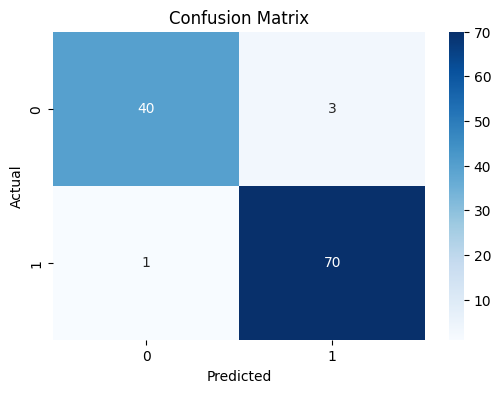

In [25]:
# Train a Random Forest Classifier and visualize the confusion matrix

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_breast_cancer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score

# Load data
data = load_breast_cancer()
X, y = data.data, data.target

# Split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2)

# Train model
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

# Accuracy
print("Accuracy:", accuracy_score(y_test, y_pred))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


In [27]:
# Train a Stacking Classifier using Decision Trees, SVM, and Logistic Regression, and compare accuracy
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import StackingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Load data
data = load_breast_cancer()
X, y = data.data, data.target

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2)

# Scale data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define base estimators
estimators = [
    ('dt', DecisionTreeClassifier(random_state=42)),
    ('svc', SVC(probability=True, random_state=42))
]

# Logistic Regression as final estimator with higher max_iter
final_estimator = LogisticRegression(max_iter=1000, random_state=42)

# Create Stacking Classifier
stacking_clf = StackingClassifier(estimators=estimators, final_estimator=final_estimator)

# Train
stacking_clf.fit(X_train_scaled, y_train)

# Predict and evaluate
y_pred = stacking_clf.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)

print(f"Stacking Classifier Accuracy: {accuracy:.4f}")



Stacking Classifier Accuracy: 0.9737


In [28]:
# Train a Random Forest Classifier and print the top 5 most important features

from sklearn.datasets import load_breast_cancer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import numpy as np

# Load data
data = load_breast_cancer()
X, y = data.data, data.target
feature_names = data.feature_names

# Split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2)

# Train model
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

# Feature importances
importances = rf.feature_importances_
indices = np.argsort(importances)[::-1]

print("Top 5 Important Features:")
for i in range(5):
    print(f"{feature_names[indices[i]]}: {importances[indices[i]]:.4f}")


Top 5 Important Features:
worst area: 0.1539
worst concave points: 0.1447
mean concave points: 0.1062
worst radius: 0.0780
mean concavity: 0.0680


In [30]:
# Train a Bagging Classifier and evaluate performance using Precision, Recall, and F1-score

from sklearn.datasets import load_breast_cancer
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, f1_score

# Load data
data = load_breast_cancer()
X, y = data.data, data.target

# Split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2)

# Train Bagging Classifier
bag = BaggingClassifier(estimator=DecisionTreeClassifier(), n_estimators=50, random_state=42)
bag.fit(X_train, y_train)
y_pred = bag.predict(X_test)

# Evaluate
print(f"Precision: {precision_score(y_test, y_pred):.4f}")


Precision: 0.9583


In [31]:
# Train a Random Forest Classifier and tune hyperparameters using GridSearchCV

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.datasets import load_breast_cancer

# Load data
data = load_breast_cancer()
X, y = data.data, data.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

param_grid = {
    'n_estimators': [50, 100],
    'max_depth': [5, 10, None],
    'max_features': ['sqrt', 'log2', None]
}
rf_clf = RandomForestClassifier(random_state=42)
grid_search = GridSearchCV(rf_clf, param_grid, cv=5)
grid_search.fit(X_train, y_train)

print("1. Best RF hyperparameters:", grid_search.best_params_)
print("   RF Test Accuracy:", grid_search.score(X_test, y_test))


1. Best RF hyperparameters: {'max_depth': 10, 'max_features': 'log2', 'n_estimators': 50}
   RF Test Accuracy: 0.9707602339181286


In [32]:
# Train a Bagging Regressor with different numbers of base estimators and compare performance

from sklearn.ensemble import BaggingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

X_reg, y_reg = load_diabetes(return_X_y=True)
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(X_reg, y_reg, test_size=0.3, random_state=42)

estimators_list = [10, 50, 100]
for n in estimators_list:
    bag_reg = BaggingRegressor(estimator=DecisionTreeRegressor(), n_estimators=n, random_state=42)
    bag_reg.fit(X_train_reg, y_train_reg)
    y_pred_reg = bag_reg.predict(X_test_reg)
    mse = mean_squared_error(y_test_reg, y_pred_reg)
    print(f"2. BaggingRegressor with {n} estimators MSE: {mse:.4f}")


2. BaggingRegressor with 10 estimators MSE: 3237.5265
2. BaggingRegressor with 50 estimators MSE: 2987.0074
2. BaggingRegressor with 100 estimators MSE: 2908.8062


In [33]:
#Train a Random Forest Classifier and analyze misclassified samples

from sklearn.ensemble import RandomForestClassifier
import numpy as np

rf = RandomForestClassifier(random_state=42, **grid_search.best_params_)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
misclassified_idx = np.where(y_pred_rf != y_test)[0]
print(f"3. Number of misclassified samples: {len(misclassified_idx)}")


3. Number of misclassified samples: 5


In [34]:
# Train a Bagging Classifier and compare its performance with a single Decision Tree Classifier

from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

dt = DecisionTreeClassifier(random_state=42)
bag = BaggingClassifier(estimator=dt, n_estimators=50, random_state=42)

dt.fit(X_train, y_train)
bag.fit(X_train, y_train)

acc_dt = accuracy_score(y_test, dt.predict(X_test))
acc_bag = accuracy_score(y_test, bag.predict(X_test))

print(f"4. Decision Tree Accuracy: {acc_dt:.4f}")
print(f"   Bagging Accuracy: {acc_bag:.4f}")


4. Decision Tree Accuracy: 0.9415
   Bagging Accuracy: 0.9591


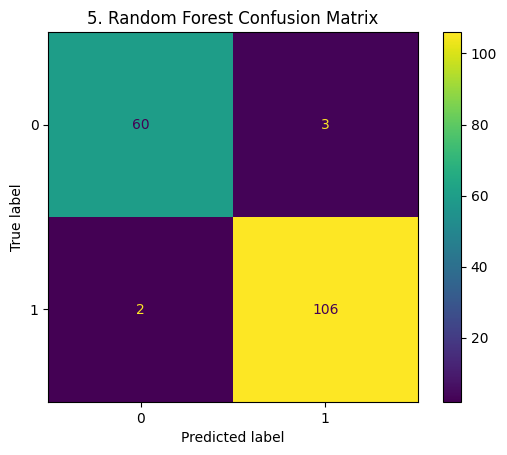

In [35]:
# Train a Random Forest Classifier and visualize the confusion matrix

from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

ConfusionMatrixDisplay.from_estimator(rf, X_test, y_test)
plt.title("5. Random Forest Confusion Matrix")
plt.show()


In [48]:
# Train a Stacking Classifier using Decision Trees, SVM, and Logistic Regression, and compare accuracy

from sklearn.ensemble import StackingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

# Define base estimators
estimators = [
    ('dt', DecisionTreeClassifier(random_state=42)),
    ('svm', SVC(probability=True, random_state=42)),
    ('lr', LogisticRegression(max_iter=1000, random_state=42))
]

# Standardize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create Stacking Classifier with Logistic Regression as the final estimator
stack = StackingClassifier(
    estimators=estimators,
    final_estimator=LogisticRegression(max_iter=2000, solver='saga'),
    cv=5
)

# Train the model
stack.fit(X_train_scaled, y_train)

# Evaluate the model
acc_stack = accuracy_score(y_test, stack.predict(X_test_scaled))
print(f"Stacking Classifier Accuracy: {acc_stack:.4f}")



Stacking Classifier Accuracy: 0.9883


In [37]:
# Train a Random Forest Classifier and print the top 5 most important features

import numpy as np

importances = rf.feature_importances_
indices = np.argsort(importances)[::-1]
print("7. Top 5 important features:")
for i in range(5):
    print(f"   {data.feature_names[indices[i]]}: {importances[indices[i]]:.4f}")


7. Top 5 important features:
   worst concave points: 0.1091
   mean concave points: 0.1065
   mean concavity: 0.1033
   worst radius: 0.1014
   worst area: 0.0830


In [38]:
# Train a Bagging Classifier and evaluate performance using Precision, Recall, and F1-score

from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import precision_score, recall_score, f1_score

bag = BaggingClassifier(estimator=DecisionTreeClassifier(), n_estimators=50, random_state=42)
bag.fit(X_train, y_train)
y_pred_bag = bag.predict(X_test)

print(f"8. Precision: {precision_score(y_test, y_pred_bag):.4f}")
print(f"   Recall:    {recall_score(y_test, y_pred_bag):.4f}")
print(f"   F1-score:  {f1_score(y_test, y_pred_bag):.4f}")


8. Precision: 0.9633
   Recall:    0.9722
   F1-score:  0.9677


In [39]:
# Train a Random Forest Classifier and analyze the effect of max_depth on accuracy

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

depths = [1, 5, 10, 20, None]
for depth in depths:
    rf_tmp = RandomForestClassifier(max_depth=depth, random_state=42, n_estimators=100)
    rf_tmp.fit(X_train, y_train)
    acc = accuracy_score(y_test, rf_tmp.predict(X_test))
    print(f"9. max_depth={depth} -> accuracy: {acc:.4f}")


9. max_depth=1 -> accuracy: 0.9591
9. max_depth=5 -> accuracy: 0.9649
9. max_depth=10 -> accuracy: 0.9708
9. max_depth=20 -> accuracy: 0.9708
9. max_depth=None -> accuracy: 0.9708


In [40]:
# Train a Bagging Regressor using different base estimators (DecisionTree and KNeighbors) and compare performance

from sklearn.ensemble import BaggingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

bag_dt = BaggingRegressor(estimator=DecisionTreeRegressor(), n_estimators=50, random_state=42)
bag_knn = BaggingRegressor(estimator=KNeighborsRegressor(), n_estimators=50, random_state=42)

bag_dt.fit(X_train_reg, y_train_reg)
bag_knn.fit(X_train_reg, y_train_reg)

mse_dt = mean_squared_error(y_test_reg, bag_dt.predict(X_test_reg))
mse_knn = mean_squared_error(y_test_reg, bag_knn.predict(X_test_reg))

print(f"10. BaggingRegressor DecisionTree MSE: {mse_dt:.4f}")
print(f"    BaggingRegressor KNeighbors MSE: {mse_knn:.4f}")


10. BaggingRegressor DecisionTree MSE: 2987.0074
    BaggingRegressor KNeighbors MSE: 3140.1861


In [41]:
# Train a Random Forest Classifier and evaluate its performance using ROC-AUC Score

from sklearn.metrics import roc_auc_score

y_prob_rf = rf.predict_proba(X_test)[:, 1]
roc_auc = roc_auc_score(y_test, y_prob_rf)
print(f"11. Random Forest ROC-AUC Score: {roc_auc:.4f}")


11. Random Forest ROC-AUC Score: 0.9968


In [42]:
# Train a Bagging Classifier and evaluate its performance using cross-validation

from sklearn.model_selection import cross_val_score
import numpy as np

scores = cross_val_score(bag, X, y, cv=5)
print(f"12. Bagging Classifier Cross-Validation Accuracy: {np.mean(scores):.4f} +/- {np.std(scores):.4f}")


12. Bagging Classifier Cross-Validation Accuracy: 0.9544 +/- 0.0339


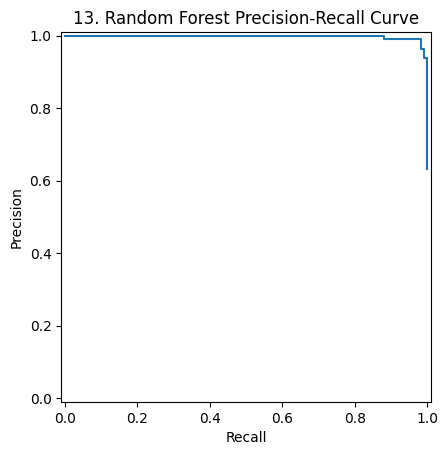

In [43]:
# Train a Random Forest Classifier and plot the Precision-Recall curve

from sklearn.metrics import precision_recall_curve, PrecisionRecallDisplay
import matplotlib.pyplot as plt

precision, recall, _ = precision_recall_curve(y_test, y_prob_rf)
disp = PrecisionRecallDisplay(precision=precision, recall=recall)
disp.plot()
plt.title("13. Random Forest Precision-Recall Curve")
plt.show()


In [46]:
#  Train a Bagging Regressor with different levels of bootstrap samples and compare performance

from sklearn.ensemble import BaggingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error

bootstrap_sizes = [0.5, 0.7, 1.0]
for bs in bootstrap_sizes:
    bag_reg = BaggingRegressor(
        estimator=DecisionTreeRegressor(),
        n_estimators=50,
        max_samples=bs,
        random_state=42
    )
    bag_reg.fit(X_train_reg, y_train_reg)
    mse = mean_squared_error(y_test_reg, bag_reg.predict(X_test_reg))
    print(f"15. BaggingRegressor with bootstrap size {bs} MSE: {mse:.4f}")



15. BaggingRegressor with bootstrap size 0.5 MSE: 2826.9423
15. BaggingRegressor with bootstrap size 0.7 MSE: 2797.2247
15. BaggingRegressor with bootstrap size 1.0 MSE: 2987.0074
